# Analisi delle componenti principali sul dataset "Iris"

## Caricamento del dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

# Abilita la visualizzazione dei grafici all'interno del notebook.
%matplotlib inline

# Imposta alcuni parametri per la visualizzazione degli array.
np.set_printoptions(threshold=55, edgeitems=10, suppress=True)
pd.set_option('display.max_rows', 10)

iris = datasets.load_iris()
dataframe = pd.concat([pd.DataFrame(iris.data), pd.DataFrame(iris.target)], axis=1)

dataframe

,0,1,2,3,0
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Esecuzione dell'analisi delle componenti principali

Si effettua, di seguito, l'esecuzione della PCA mediante Scikit-learn.

In [2]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris.data)

print("Matrice degli assi principali:\n{0}".format(pca.components_.T))
print("\nPercentuale di varianza cumulativa conservata dalle componenti principali:\n{0}"
      .format(np.cumsum(pca.explained_variance_ratio_)))

Matrice degli assi principali:
[[ 0.36158968 -0.65653988  0.58099728  0.31725455]
 [-0.08226889 -0.72971237 -0.59641809 -0.32409435]
 [ 0.85657211  0.1757674  -0.07252408 -0.47971899]
 [ 0.35884393  0.07470647 -0.54906091  0.75112056]]

Percentuale di varianza cumulativa conservata dalle componenti principali:
[ 0.92461621  0.97763178  0.99481691  1.        ]


La classe PCA di Scikit-learn non restituisce lo spettro della matrice di covarianza del dataset specificato.
Calcoliamo, pertanto, gli autovalori di tale matrice partendo dalle percentuali di varianza già valutate. Tali autovalori saranno già ordinati in modo decrescente perché i valori di partenza lo erano.

In [3]:
sk_eigenvalues = pca.explained_variance_ratio_ * np.trace(dataframe.cov())
print("Autovalori della matrice di covarianza:\n{0}".format(sk_eigenvalues))

Autovalori della matrice di covarianza:
[ 4.84538856  0.27782449  0.09005756  0.02716161]


Si mostra, di seguito, uno screeplot degli autovalori determinati dalla PCA.

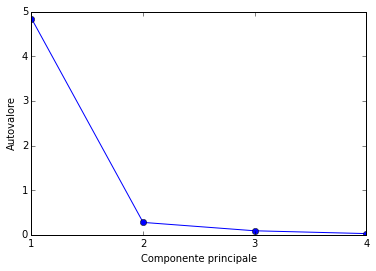

In [4]:
def draw_screeplot(eigenvalues, logarithm=False):
    """Disegna uno screeplot degli autovalori determinati dalla PCA.

    Args:
        eigenvalues: autovalori determinati dalla PCA.
        logarithm: True se si vuole uno screeplot logaritmico, False altrimenti.

    """
    plt.figure()
    indexes = np.arange(len(eigenvalues)) + 1
    if logarithm:
        plt.plot(indexes, np.log(eigenvalues), 'o-')
    else:
        plt.plot(indexes, eigenvalues, 'o-')
    plt.xlabel("Componente principale")
    plt.ylabel("Autovalore")
    plt.xticks(indexes)
    plt.show()

draw_screeplot(sk_eigenvalues)

Determiniamo, di seguito, la proiezione del dataset sulle prime due componenti determinate dalla PCA.

In [5]:
pca = PCA(n_components=1)
pca_components = pca.fit_transform(iris.data)

pca_components

array([[-2.68420713],
       [-2.71539062],
       [-2.88981954],
       [-2.7464372 ],
       [-2.72859298],
       [-2.27989736],
       [-2.82089068],
       [-2.62648199],
       [-2.88795857],
       [-2.67384469],
       ..., 
       [ 2.31430339],
       [ 1.92245088],
       [ 1.41407223],
       [ 2.56332271],
       [ 2.41939122],
       [ 1.94401705],
       [ 1.52566363],
       [ 1.76404594],
       [ 1.90162908],
       [ 1.38966613]])

Si mostra, di seguito, il cerchio di correlazione tra le feature e le componenti principali determinate dalla PCA.

In [6]:
from scipy.stats import pearsonr

def pca_correlations(dataset, principal_component_1, principal_component_2):
    """Calcola le correlazioni tra le feature e le prime due componenti principali determinate dalla PCA.

    Args:
        dataset: matrice costituita sulle righe dai campioni e sulle colonne dalle feature.
        principal_component_1: prima componente principale determinata dalla PCA.
        principal_component_2: seconda componente principale determinata dalla PCA.

    Returns:
        correlations: matrice avente come righe le correlazioni relative a ciascuna feature.

    """
    correlations = []
    for feature in dataset.T:
        correlation_comp_1 = pearsonr(feature, principal_component_1)[0]
        correlation_comp_2 = pearsonr(feature, principal_component_2)[0]
        correlations.append([correlation_comp_1, correlation_comp_2])
    correlations = np.array(correlations)
    return correlations

def draw_correlation_circle(correlations):
    """Disegna il cerchio delle correlazioni a partire dalla matrice delle correlazioni specificata.

    Args:
        correlations:  matrice avente come righe le correlazioni relative a ciascuna feature.

    """
    fig, ax = plt.subplots()
    plt.scatter(correlations[:, 0], correlations[:, 1])
    for i, xy in enumerate(zip(correlations[:, 0], correlations[:, 1])):
        ax.annotate("X{0}".format(i), xy=xy) 
    circle = plt.Circle((0,0),1, facecolor='none')
    fig.gca().add_artist(circle)
    ax.set_aspect('equal')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

projections = pca_components_3d
correlations = pca_correlations(iris.data, pca_components_3d[:, 0], pca_components_3d[:, 1])
print("Coefficienti di correlazione:\n{0}".format(correlations))
draw_correlation_circle(correlations)

NameError: name 'pca_components_3d' is not defined

Visualizziamo, a scopo esplorativo, il dataset ottenuto considerando le prime 3 componenti principali determinate dalla PCA.

In [ ]:
pca = PCA(n_components=3)
pca_components_3d = pca.fit_transform(iris.data)

fig = plt.figure()
ax = Axes3D(fig)
targets = iris.target
ax.scatter(pca_components_3d[:, 0], pca_components_3d[:, 1], pca_components_3d[:, 2], c=targets, cmap=plt.cm.rainbow)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X3")
plt.show()